<a href="https://colab.research.google.com/github/adikush1/Modelling-And-Forecasting-Exchange-Rate/blob/main/Modelling_Forecasting_Exchange_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
train_df=pd.read_excel("/content/drive/MyDrive/forex_model.xlsx",sheet_name="Linear ")
train_df.head()

,Year,Trade Deficit (% of GDP),"Total reserves (includes gold, current US$)",Population growth (annual %),Crude Oil Price (dollar per barrel),FDI (% GDP),Exchange Rates
0,1978,0.28,8.316116e+09,2.24,9.00,0.013175,8.192840
1,1979,1.42,1.181541e+10,2.25,12.64,0.031747,8.125791
2,1980,3.11,1.200979e+10,2.29,21.59,0.042485,7.862945
3,1981,2.63,8.108838e+09,2.30,31.77,0.047506,8.658523
4,1982,2.16,8.241562e+09,2.29,28.52,0.035912,9.455132


Correlation

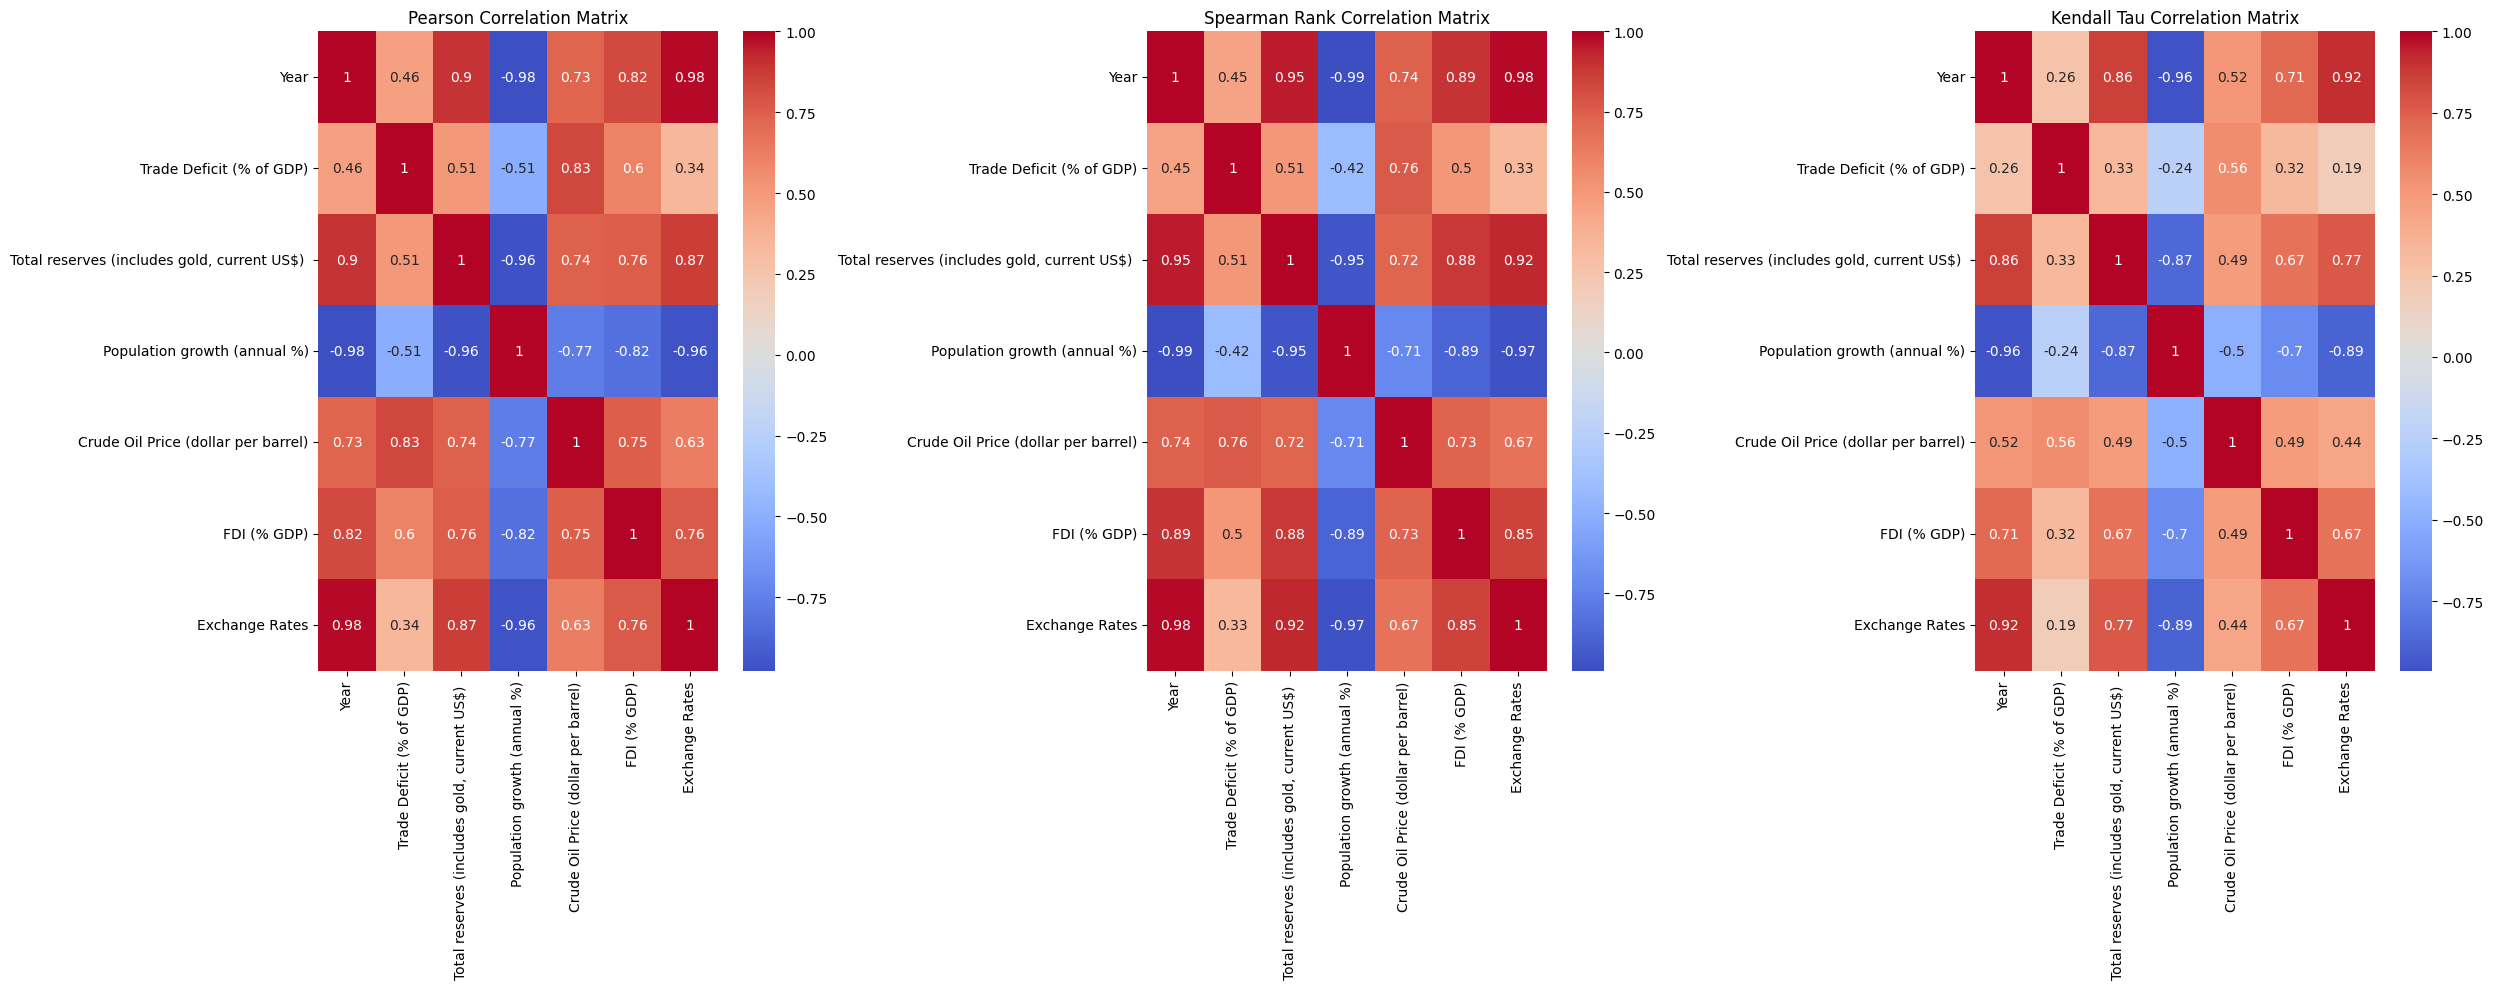

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# train_df = pd.read_csv("your_dataset.csv")

# Calculate correlation matrices
pearson_corr_matrix = train_df.corr(method='pearson')
spearman_corr_matrix = train_df.corr(method='spearman')
kendall_corr_matrix = train_df.corr(method='kendall')

# Create heatmaps using Seaborn
plt.figure(figsize=(25, 10))

# Pearson Correlation Matrix Heatmap
plt.subplot(131)
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix")

# Spearman Rank Correlation Matrix Heatmap
plt.subplot(132)
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Rank Correlation Matrix")

# Kendall Tau Correlation Matrix Heatmap
plt.subplot(133)
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Kendall Tau Correlation Matrix")

plt.tight_layout()
plt.show()


1. Logically, exchange rate and trade balance are negatively correlated which says if the trade balance is positive, INR will appreciate.
2. Secondly, exchange rate and real interest rate are negatively correlated which says if interest rate is high then the foreign investment will increase and so currency appreciates.


## ***Scaling using Z score***

In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named "train_df"
independent_features = train_df.drop("Exchange Rates", axis=1)  # Drop the dependent variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the independent features using the scaler
scaled_features = scaler.fit_transform(independent_features)

# Create a DataFrame with the scaled independent features
scaled_independent_df = pd.DataFrame(scaled_features, columns=independent_features.columns)

# Combine the scaled independent features with the dependent variable
scaled_train_df = pd.concat([scaled_independent_df, train_df["Exchange Rates"]], axis=1)

# Display the scaled DataFrame
print(scaled_train_df.head())


       Year  Trade Deficit (% of GDP)  \
0 -1.693979                 -1.219517   
1 -1.616980                 -0.514284   
2 -1.539981                  0.531193   
3 -1.462982                  0.234253   
4 -1.385983                 -0.056501   

   Total reserves (includes gold, current US$)   Population growth (annual %)  \
0                                     -0.812697                      1.066668   
1                                     -0.794015                      1.088106   
2                                     -0.792978                      1.173859   
3                                     -0.813804                      1.195297   
4                                     -0.813095                      1.173859   

   Crude Oil Price (dollar per barrel)  FDI (% GDP)  Exchange Rates  
0                            -1.087018    -1.040050        8.192840  
1                            -0.954417    -1.019180        8.125791  
2                            -0.628380    -1.007113     

### ***ARIMA TIME SERIES MODEL***

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your scaled dataset (replace with your actual data)
# scaled_data = pd.read_csv("your_scaled_dataset.csv")

# Assuming your scaled dataset contains features and a scaled target "Exchange Rates"
scaled_features = scaled_train_df.drop("Exchange Rates", axis=1)
scaled_target = scaled_train_df["Exchange Rates"]

# Split the data into training and test sets
train_size = int(0.8 * len(scaled_features))
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Fit an ARIMA model to the scaled training target
p, d, q = 1, 1, 1  # Set appropriate values for ARIMA order
model = ARIMA(train_target, order=(p, d, q))
model_fit = model.fit()

# Forecast future values using the ARIMA model
forecast_steps = len(test_features)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate evaluation metrics for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_target, forecast))
arima_mae = mean_absolute_error(test_target, forecast)
arima_mape = np.mean(np.abs((test_target - forecast) / test_target)) * 100

print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAE:", arima_mae)
print("ARIMA MAPE:", arima_mape)


ARIMA RMSE: 1.6781641953418283
ARIMA MAE: 1.3411614022937357
ARIMA MAPE: 1.9106386624838878


## ***ARMA TIME SERIES MODEL***

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your scaled dataset (replace with your actual data)
# scaled_data = pd.read_csv("your_scaled_dataset.csv")

# Assuming your scaled dataset contains features and a scaled target "Exchange Rates"
scaled_features = scaled_train_df.drop("Exchange Rates", axis=1)
scaled_target = scaled_train_df["Exchange Rates"]

# Split the data into training and test sets
train_size = int(0.8 * len(scaled_features))
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Fit an ARMA model to the scaled training target
p, q = 1, 1  # Set appropriate values for ARMA order
d = 0  # Since we're using ARMA, differencing is not needed
model = ARIMA(train_target, order=(p, d, q))
model_fit = model.fit()

# Forecast future values using the ARMA model
forecast_steps = len(test_features)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate evaluation metrics for ARMA
arma_rmse = np.sqrt(mean_squared_error(test_target, forecast))
arma_mae = mean_absolute_error(test_target, forecast)
arma_mape = np.mean(np.abs((test_target - forecast) / test_target)) * 100

print("ARMA RMSE:", arma_rmse)
print("ARMA MAE:", arma_mae)
print("ARMA MAPE:", arma_mape)


ARMA RMSE: 12.32428461267272
ARMA MAE: 10.785028408284672
ARMA MAPE: 15.019397944703877


## ***LINEAR REGRESSION***

In [ ]:

import statsmodels.api as sm

# Load your scaled dataset
# scaled_data = pd.read_csv("your_scaled_dataset.csv")

# Assuming your scaled dataset contains features and a scaled target "Exchange Rate"
scaled_features = scaled_train_df.drop("Exchange Rates", axis=1)  # Replace with your feature columns
scaled_target = scaled_train_df["Exchange Rates"]

# Add a constant term to the features for the intercept in the linear regression
scaled_features = sm.add_constant(scaled_features)

# Split the data into training and test sets
train_size = int(0.8 * len(scaled_features))
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Fit Linear Regression using Ordinary Least Squares (OLS)
model = sm.OLS(train_target, train_features)
result = model.fit()

# Predict using the fitted model
predictions = result.predict(test_features)

# Calculate evaluation metrics for Linear Regression
rmse = np.sqrt(np.mean((test_target - predictions) ** 2))
mae = np.mean(np.abs(test_target - predictions))
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

print("Linear Regression RMSE:", rmse)
print("Linear Regression MAE:", mae)
print("Linear Regression MAPE:", mape)

# Print R-squared value from the fitted model
print("R-squared:", result.rsquared)


Linear Regression RMSE: 12.751292779947853
Linear Regression MAE: 11.317372929590094
Linear Regression MAPE: 15.939007250600657
R-squared: 0.9821242495535992


In [ ]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load your scaled dataset
# scaled_data = pd.read_csv("your_scaled_dataset.csv")

# Assuming your scaled dataset contains features and a scaled target "Exchange Rate"
scaled_features = scaled_train_df.drop("Exchange Rates", axis=1)  # Replace with your feature columns
scaled_target = scaled_train_df["Exchange Rates"]

# Split the data into training and test sets
train_size = int(0.8 * len(scaled_features))
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Fit Linear Regression using sklearn's LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(train_features, train_target)
sklearn_predictions = sklearn_model.predict(test_features)

# Calculate evaluation metrics for sklearn Linear Regression
sklearn_rmse = np.sqrt(np.mean((test_target - sklearn_predictions) ** 2))
sklearn_mae = np.mean(np.abs(test_target - sklearn_predictions))
sklearn_mape = np.mean(np.abs((test_target - sklearn_predictions) / test_target)) * 100

print("Sklearn Linear Regression RMSE:", sklearn_rmse)
print("Sklearn Linear Regression MAE:", sklearn_mae)
print("Sklearn Linear Regression MAPE:", sklearn_mape)

# Fit Linear Regression using statsmodels' OLS
statsmodels_features = sm.add_constant(train_features)
statsmodels_model = sm.OLS(train_target, statsmodels_features)
statsmodels_result = statsmodels_model.fit()
statsmodels_predictions = statsmodels_result.predict(sm.add_constant(test_features))

# Calculate evaluation metrics for statsmodels OLS
statsmodels_rmse = np.sqrt(np.mean((test_target - statsmodels_predictions) ** 2))
statsmodels_mae = np.mean(np.abs(test_target - statsmodels_predictions))
statsmodels_mape = np.mean(np.abs((test_target - statsmodels_predictions) / test_target)) * 100

print("Statsmodels Linear Regression RMSE:", statsmodels_rmse)
print("Statsmodels Linear Regression MAE:", statsmodels_mae)
print("Statsmodels Linear Regression MAPE:", statsmodels_mape)

# Print R-squared values from both implementations
print("Sklearn Linear Regression R-squared:", sklearn_model.score(test_features, test_target))
print("Statsmodels Linear Regression R-squared:", statsmodels_result.rsquared)


Sklearn Linear Regression RMSE: 12.751292779947857
Sklearn Linear Regression MAE: 11.317372929590098
Sklearn Linear Regression MAPE: 15.939007250600662
Statsmodels Linear Regression RMSE: 12.751292779947853
Statsmodels Linear Regression MAE: 11.317372929590094
Statsmodels Linear Regression MAPE: 15.939007250600657
Sklearn Linear Regression R-squared: -4.859384680573057
Statsmodels Linear Regression R-squared: 0.9821242495535992


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, meanabs

# Assuming your scaled dataset contains features and a scaled target "Exchange Rates"
selected_features = ["Trade Deficit (% of GDP)", "Total reserves (includes gold, current US$) ",
                     "Population growth (annual %)", "Crude Oil Price (dollar per barrel)",
                     "FDI (% GDP)"]  # Update with your selected feature columns

scaled_features = scaled_train_df[selected_features]
scaled_target = scaled_train_df["Exchange Rates"]

# Split the scaled data into training and test sets
train_size = int(0.8 * len(scaled_features))
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Fit the VAR model on the scaled training data
model = VAR(train_features)
lags = model.select_order(maxlags=2)  # Choose an appropriate lag order
result = model.fit(lags.maxlags)  # Use lags.maxlags to specify the selected lag order

# Forecast future values on the scaled test data
forecast = result.forecast(train_features.values[-lags.maxlags:], steps=len(test_features))

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, columns=selected_features, index=test_features.index)

# Calculate evaluation metrics for the forecast
forecast_rmse = rmse(test_target, forecast_df["Exchange Rates"])
forecast_mae = meanabs(test_target, forecast_df["Exchange Rates"])

print("Forecast RMSE:", forecast_rmse)
print("Forecast MAE:", forecast_mae)


AttributeError: ignored

# Analysis

Inflation

Text(0, 0.5, 'CPI')

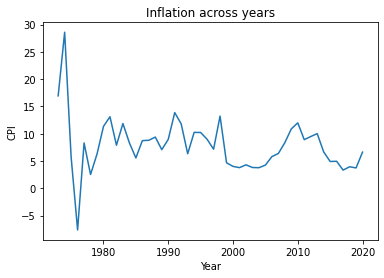

In [ ]:
plt.plot(train_df['Year'],train_df['Inflation'])
plt.title('Inflation across years')
plt.xlabel('Year')
plt.ylabel('CPI')

Here we can see

1. Around 1973-74 due to over dependence of fuel import, inflation crossed above 20% for the first time in the history

2. During 1991 Indian economic crisis led to hike inflation

3. 2008 Global Financial Crisis has led to another spike in inflation


Exchange Rate

Text(0, 0.5, 'Exchange Rate')

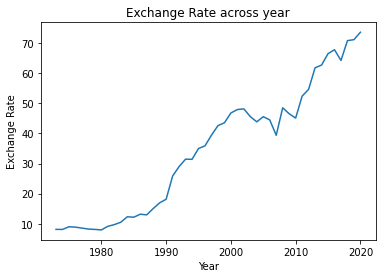

In [ ]:
plt.plot(train_df['Year'],train_df['Exchange Rate(INR/USD)'])
plt.title('Exchange Rate across year')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')

1. Exchange rate is showing steady upward trend not just because of Indian Rupee is depreciating but also due to strengthening of Dollar

2. In multiple parts of history to promote the export and increase export competitiveness, India has depreciated its currency against Dollar

FDI as % of GDP

Text(0, 0.5, 'FDI in % of GDP')

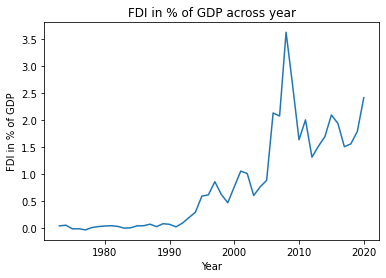

In [ ]:
plt.plot(train_df['Year'],train_df['FDI in % of GDP'])
plt.title('FDI in % of GDP across year')
plt.xlabel('Year')
plt.ylabel('FDI in % of GDP')

FDI has steady increase across years.

In recent years, FDI inflow is seeing record high numbers

GDP Growth

Text(0, 0.5, 'GDP Growth')

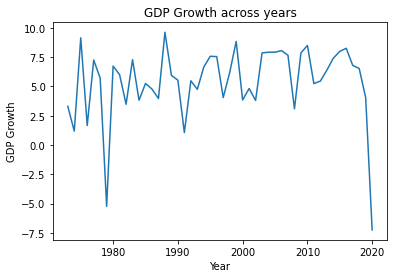

In [ ]:
plt.plot(train_df['Year'],train_df['GDP growth'])
plt.title('GDP Growth across years')
plt.xlabel('Year')
plt.ylabel('GDP Growth')

# Regression Model

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x=train_df[['TradeBalance','Real Interest Rate']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 2.27546126e+01, -2.63712853e-04, -4.70062929e-02])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.598
Model:                                OLS   Adj. R-squared:                  0.581
Method:                     Least Squares   F-statistic:                     33.53
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           1.21e-09
Time:                            16:20:53   Log-Likelihood:                -192.59
No. Observations:                      48   AIC:                             391.2
Df Residuals:                          45   BIC:                             396.8
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.7546      6.297      3.613      0.001      10.071      35.438
TradeBalance          -0.0003   3.68e-05     -7.167      0.000      -0.000      -0.000
Real Interest Rate    -0.0470      0.785     -0.060      0.953      -1.628       1.534
==============================================================================
Omnibus:                       16.480   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.087
Skew:                           0.312   Prob(JB):                        0.130
Kurtosis:                       1.714   Cond. No.                     2.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['TradeBalance','Real Interest Rate','FDI in % of GDP']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 1.62733862e+01, -1.29608290e-04,  3.37910450e-01,  1.24093426e+01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.702
Model:                                OLS   Adj. R-squared:                  0.681
Method:                     Least Squares   F-statistic:                     34.50
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           1.26e-11
Time:                            16:20:59   Log-Likelihood:                -185.45
No. Observations:                      48   AIC:                             378.9
Df Residuals:                          44   BIC:                             386.4
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 16.2734      5.734      2.838      0.007       4.716      27.830
TradeBalance          -0.0001    4.7e-05     -2.758      0.008      -0.000   -3.49e-05
Real Interest Rate     0.3379      0.691      0.489      0.627      -1.055       1.731
FDI in % of GDP       12.4093      3.179      3.903      0.000       6.002      18.817
==============================================================================
Omnibus:                        5.571   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                2.307
Skew:                          -0.180   Prob(JB):                        0.316
Kurtosis:                       1.988   Cond. No.                     2.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['TradeBalance','Real Interest Rate','FDI in % of GDP','Inflation']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 2.32346594e+01, -1.25666074e-04,  1.29478977e-01,  1.17609844e+01,
       -6.25230684e-01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.722
Model:                                OLS   Adj. R-squared:                  0.696
Method:                     Least Squares   F-statistic:                     27.90
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           1.86e-11
Time:                            16:21:05   Log-Likelihood:                -183.77
No. Observations:                      48   AIC:                             377.5
Df Residuals:                          43   BIC:                             386.9
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 23.2347      6.851      3.391      0.002       9.418      37.052
TradeBalance          -0.0001    4.6e-05     -2.734      0.009      -0.000    -3.3e-05
Real Interest Rate     0.1295      0.686      0.189      0.851      -1.253       1.512
FDI in % of GDP       11.7610      3.127      3.761      0.001       5.454      18.068
Inflation             -0.6252      0.354     -1.765      0.085      -1.340       0.089
==============================================================================
Omnibus:                        5.372   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.532
Skew:                          -0.275   Prob(JB):                        0.282
Kurtosis:                       2.018   Cond. No.                     3.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['TradeBalance','Real Interest Rate','FDI in % of GDP','Inflation','GDP growth']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 2.25607114e+01, -1.23185990e-04,  7.73989884e-02,  1.17977403e+01,
       -6.21727637e-01,  1.95892183e-01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.723
Model:                                OLS   Adj. R-squared:                  0.690
Method:                     Least Squares   F-statistic:                     21.89
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           9.99e-11
Time:                            16:21:10   Log-Likelihood:                -183.70
No. Observations:                      48   AIC:                             379.4
Df Residuals:                          42   BIC:                             390.6
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.5607      7.181      3.142      0.003       8.069      37.052
TradeBalance          -0.0001    4.7e-05     -2.623      0.012      -0.000   -2.84e-05
Real Interest Rate     0.0774      0.708      0.109      0.913      -1.352       1.507
FDI in % of GDP       11.7977      3.161      3.732      0.001       5.418      18.177
Inflation             -0.6217      0.358     -1.736      0.090      -1.344       0.101
GDP growth             0.1959      0.555      0.353      0.726      -0.925       1.317
==============================================================================
Omnibus:                        6.117   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                2.588
Skew:                          -0.247   Prob(JB):                        0.274
Kurtosis:                       1.976   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finding VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [ ]:
vif_data

,feature,VIF
0,TradeBalance,4.329031
1,Real Interest Rate,3.867425
2,FDI in % of GDP,4.580814
3,Inflation,2.575794
4,GDP growth,3.842033


VIF is below 10 so no multicollinearity

# Evaluation

In [ ]:
y_pred=22.7546-0.0003*train_df['TradeBalance']-0.0470*train_df['Real Interest Rate']

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, y_pred))

RMSE value

In [ ]:
rms

13.661474573364085